Di bawah ini adalah library yang digunakan untuk preprocessing dataset.

In [11]:
import pandas as pd
from gensim.parsing.preprocessing import remove_stopwords,PorterStemmer
from nltk.tokenize import casual_tokenize
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import brown
import numpy as np
from sklearn.preprocessing import OneHotEncoder

Load data dari all-data.csv ke Pandas DataFrame. Lalu, memisahkan data menjadi x_data (text) dan y_data (target).

In [12]:
dataset = pd.read_csv("all-data.csv",
                      encoding="ISO-8859-1",
                      names=["target","text"])  
X_data = dataset['text'].values
y_data = dataset['target'].values

Melakukan preprocessing dataset berupa:

- Mengubah semua huruf menjadi huruf kecil
- Menghilangkan karakter-karakter spesial
- Menghilangkan huruf sama yang berurutan
- Menghilangkan kata yang terdiri dari 1 huruf

In [13]:
data_dummy = dataset.copy()
X_dummy = data_dummy['text']
y_clean = data_dummy['target']

# Convert to Lower Case
X_dummy = X_dummy.str.lower()
# Replace Number
X_dummy = X_dummy.str.replace("(\d+)[^ ]*",' ')
# Replace URL
X_dummy = X_dummy.str.replace("(http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*",' ')
# Replace Tag
X_dummy = X_dummy.str.replace("@[^ ]*",' ')
# Replace ' to nothing
X_dummy = X_dummy.str.replace("'",'')
# Remove Punctuation
X_dummy = X_dummy.str.replace('[!"#$%&()*+,-./:;<=>?@[\]^_`{|}~]',' ')
# Replace 3+ Consecutive Letter with only 2
X_dummy = X_dummy.str.replace("(.)\\1\\1+",'\\1\\1')
# Remove Independent words with length 1
X_dummy = X_dummy.str.replace("(^| ).( |$)",' ')

X_dummy[0:10]

0    according to gran  the company has no plans to...
1    technopolis plans to develop in stages an area...
2    the international electronic industry company ...
3    with the new production plant the company woul...
4    according to the company updated strategy for ...
5    financing of aspocomp growth aspocomp is aggre...
6    for the last quarter of  componenta net sales ...
7    in the third quarter of  net sales increased b...
8    operating profit rose to eur  mn from eur  mn ...
9    operating profit totalled eur  mn  up from eur...
Name: text, dtype: object

Melakukan preprocessing berupa:

- Tokenization
- Stop words removal
- Stemming

In [14]:
X_clean = []
for sentence in X_dummy:
    # sentence = str(TextBlob(sentence).correct())
    tokenized = casual_tokenize(sentence)
    new_tokenized = ""
    for word in tokenized:
        #Remove Stopword
        word = remove_stopwords(word)
        if word == '':
            continue
        #Stemming
        stemmer = SnowballStemmer('english')
        word = stemmer.stem(word) 
        new_tokenized += (word + ' ')
    X_clean.append(new_tokenized.lstrip())

X_clean[0]

'accord gran compani plan product russia compani grow '

Menggunakan train_test_split dari sklearn untuk memisahkan dataset menjadi training dataset (70%) dan test dataset (30%).

In [15]:
from sklearn.model_selection import train_test_split
import numpy as np
X_train,X_test,y_train,y_test = train_test_split(X_clean,y_clean,test_size=0.3,random_state=101)
print(np.array(X_train).shape)
print(np.array(X_test).shape)

(3392,)
(1454,)


Menggunakan TfidfVectorizer dari sklearn untuk mengubah data berupa kalimat menjadi vector berisi nilai TF-IDF dari tiap kata agar bisa digunakan sebagai input dalam learning model.

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(ngram_range=(1,2))
vect.fit(X_clean)
X_train = vect.transform(X_train)
X_test = vect.transform(X_test)

In [17]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,BaseDiscreteNB,GaussianNB
from sklearn.neighbors import KNeighborsClassifier  
import numpy as np

model = LogisticRegression(n_jobs=-1,max_iter=1000)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

Precision: [0.625      0.68734694 0.82424242]
Recall: [0.2484472  0.98710434 0.30909091]
Accuracy: 0.7001375515818432
Confusion Matrix:


Text(33.0, 0.5, 'Predict')

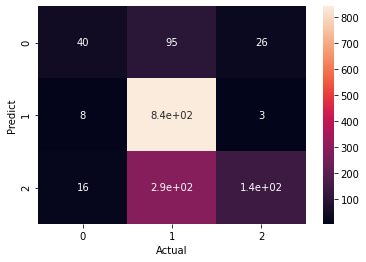

In [18]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score
from sklearn.preprocessing import LabelEncoder
x = LabelEncoder().fit_transform(y_test.values)
y = LabelEncoder().fit_transform(y_predict)
precision = precision_score(x,y, average=None)
recall = recall_score(x,y, average=None)
accuracy = accuracy_score(x,y)
print("Precision: {}".format(precision))
print("Recall: {}".format(recall))
print("Accuracy: {}".format(accuracy))
print('Confusion Matrix:')
import seaborn as sns
import matplotlib.pyplot as plt
conf = confusion_matrix(y_test,y_predict)
sns.heatmap(conf,annot=True)
plt.xlabel('Actual')
plt.ylabel('Predict')

In [19]:
model = LogisticRegression(n_jobs=-1,max_iter=1000)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
print(accuracy)
confusion_matrix(y_test,y_predict)

0.7001375515818432


array([[ 40,  95,  26],
       [  8, 842,   3],
       [ 16, 288, 136]], dtype=int64)

In [20]:
model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
print(accuracy)
confusion_matrix(y_test,y_predict)

0.6169188445667125


array([[ 23, 133,   5],
       [  5, 847,   1],
       [ 16, 397,  27]], dtype=int64)

In [21]:
model = MultinomialNB()  
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
print(accuracy)
confusion_matrix(y_test,y_predict)

0.6678129298486932


array([[ 13, 112,  36],
       [  1, 847,   5],
       [  0, 329, 111]], dtype=int64)

In [22]:
model = BernoulliNB()  
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
print(accuracy)
confusion_matrix(y_test,y_predict)

0.6313617606602476


array([[  0, 136,  25],
       [  0, 844,   9],
       [  0, 366,  74]], dtype=int64)

In [23]:
model = LinearSVC(random_state=0, tol=1e-5)
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
accuracy = accuracy_score(y_test,y_predict)
print(accuracy)
confusion_matrix(y_test,y_predict)

0.7441540577716643


array([[ 72,  66,  23],
       [ 15, 815,  23],
       [ 21, 224, 195]], dtype=int64)